In [1]:
import pandas as pd

In [4]:
# Load datasets
file_path = 'data/Assignment.xlsx'
user_details = pd.read_excel(r"C:\Users\bhanu\Downloads\Assignment.xlsx", sheet_name='UserDetails.csv')
cooking_sessions = pd.read_excel(r"C:\Users\bhanu\Downloads\Assignment.xlsx", sheet_name='CookingSessions.csv')
order_details = pd.read_excel(r"C:\Users\bhanu\Downloads\Assignment.xlsx", sheet_name='OrderDetails.csv')


In [5]:
print(user_details.head())
print(cooking_sessions.head())
print(order_details.head())


  User ID      User Name  Age       Location Registration Date         Phone  \
0    U001  Alice Johnson   28       New York        2023-01-15  123-456-7890   
1    U002      Bob Smith   35    Los Angeles        2023-02-20  987-654-3210   
2    U003    Charlie Lee   42        Chicago        2023-03-10  555-123-4567   
3    U004    David Brown   27  San Francisco        2023-04-05  444-333-2222   
4    U005     Emma White   30        Seattle        2023-05-22  777-888-9999   

               Email Favorite Meal  Total Orders  
0    alice@email.com        Dinner            12  
1      bob@email.com         Lunch             8  
2  charlie@email.com     Breakfast            15  
3    david@email.com        Dinner            10  
4     emma@email.com         Lunch             9  
  Session ID User ID        Dish Name  Meal Type       Session Start  \
0       S001    U001        Spaghetti     Dinner 2024-12-01 19:00:00   
1       S002    U002     Caesar Salad      Lunch 2024-12-01 12:00:00 

In [6]:
# data cleaning
print(user_details.isnull().sum())
print(cooking_sessions.isnull().sum())
print(order_details.isnull().sum())


User ID              0
User Name            0
Age                  0
Location             0
Registration Date    0
Phone                0
Email                0
Favorite Meal        0
Total Orders         0
dtype: int64
Session ID         0
User ID            0
Dish Name          0
Meal Type          0
Session Start      0
Session End        0
Duration (mins)    0
Session Rating     0
dtype: int64
Order ID        0
User ID         0
Order Date      0
Meal Type       0
Dish Name       0
Order Status    0
Amount (USD)    0
Time of Day     0
Rating          2
Session ID      0
dtype: int64


In [7]:
order_details['Rating'] = order_details['Rating'].fillna(order_details['Rating'].mean())


In [9]:
print(order_details.isnull().sum())

Order ID        0
User ID         0
Order Date      0
Meal Type       0
Dish Name       0
Order Status    0
Amount (USD)    0
Time of Day     0
Rating          0
Session ID      0
dtype: int64


In [10]:
cooking_sessions['Session Start'] = pd.to_datetime(cooking_sessions['Session Start'])
cooking_sessions['Session End'] = pd.to_datetime(cooking_sessions['Session End'])
order_details['Order Date'] = pd.to_datetime(order_details['Order Date'])


In [12]:
print(cooking_sessions.head())

  Session ID User ID        Dish Name  Meal Type       Session Start  \
0       S001    U001        Spaghetti     Dinner 2024-12-01 19:00:00   
1       S002    U002     Caesar Salad      Lunch 2024-12-01 12:00:00   
2       S003    U003  Grilled Chicken     Dinner 2024-12-02 19:30:00   
3       S004    U001         Pancakes  Breakfast 2024-12-02 07:30:00   
4       S005    U004     Caesar Salad      Lunch 2024-12-03 13:00:00   

          Session End  Duration (mins)  Session Rating  
0 2024-12-01 19:30:00               30             4.5  
1 2024-12-01 12:20:00               20             4.0  
2 2024-12-02 20:10:00               40             4.8  
3 2024-12-02 08:00:00               30             4.2  
4 2024-12-03 13:15:00               15             4.7  


In [13]:
user_details = user_details.drop_duplicates()


In [15]:
user_details

,User ID,User Name,Age,Location,Registration Date,Phone,Email,Favorite Meal,Total Orders
0,U001,Alice Johnson,28,New York,2023-01-15,123-456-7890,alice@email.com,Dinner,12
1,U002,Bob Smith,35,Los Angeles,2023-02-20,987-654-3210,bob@email.com,Lunch,8
2,U003,Charlie Lee,42,Chicago,2023-03-10,555-123-4567,charlie@email.com,Breakfast,15
3,U004,David Brown,27,San Francisco,2023-04-05,444-333-2222,david@email.com,Dinner,10
4,U005,Emma White,30,Seattle,2023-05-22,777-888-9999,emma@email.com,Lunch,9
5,U006,Frank Green,25,Austin,2023-06-15,888-777-6666,frank@email.com,Dinner,7
6,U007,Grace King,38,Boston,2023-07-02,999-888-7777,grace@email.com,Breakfast,14
7,U008,Henry Lee,31,Miami,2023-08-11,101-202-3030,henry@email.com,Dinner,5
8,U009,Irene Moore,33,Dallas,2023-09-01,202-303-4040,irene@email.com,Lunch,6
9,U010,Jack White,29,Phoenix,2023-10-10,303-404-5050,jack@email.com,Dinner,8


In [19]:
# Merge Datasets
#Merge CookingSessions and OrderDetails using Session ID
sessions_orders = pd.merge(cooking_sessions, order_details, on='Session ID', how='inner')


In [20]:
sessions_orders

,Session ID,User ID_x,Dish Name_x,Meal Type_x,Session Start,Session End,Duration (mins),Session Rating,Order ID,User ID_y,Order Date,Meal Type_y,Dish Name_y,Order Status,Amount (USD),Time of Day,Rating
0,S001,U001,Spaghetti,Dinner,2024-12-01 19:00:00,2024-12-01 19:30:00,30,4.5,1001,U001,2024-12-01,Dinner,Spaghetti,Completed,15.0,Night,5.000000
1,S002,U002,Caesar Salad,Lunch,2024-12-01 12:00:00,2024-12-01 12:20:00,20,4.0,1002,U002,2024-12-01,Lunch,Caesar Salad,Completed,10.0,Day,4.000000
2,S003,U003,Grilled Chicken,Dinner,2024-12-02 19:30:00,2024-12-02 20:10:00,40,4.8,1003,U003,2024-12-02,Dinner,Grilled Chicken,Canceled,12.5,Night,4.285714
3,S004,U001,Pancakes,Breakfast,2024-12-02 07:30:00,2024-12-02 08:00:00,30,4.2,1004,U001,2024-12-02,Breakfast,Pancakes,Completed,8.0,Morning,4.000000
4,S005,U004,Caesar Salad,Lunch,2024-12-03 13:00:00,2024-12-03 13:15:00,15,4.7,1005,U004,2024-12-03,Lunch,Caesar Salad,Completed,9.0,Day,4.000000
5,S006,U002,Spaghetti,Dinner,2024-12-03 18:30:00,2024-12-03 19:00:00,30,4.3,1006,U002,2024-12-03,Dinner,Spaghetti,Completed,14.0,Night,4.000000
6,S007,U005,Grilled Chicken,Dinner,2024-12-04 18:00:00,2024-12-04 18:45:00,45,4.6,1007,U005,2024-12-04,Dinner,Grilled Chicken,Completed,13.5,Night,4.000000
7,S008,U003,Veggie Burger,Lunch,2024-12-04 13:30:00,2024-12-04 13:50:00,20,4.4,1008,U003,2024-12-04,Lunch,Veggie Burger,Canceled,11.0,Day,4.285714
8,S009,U001,Grilled Chicken,Dinner,2024-12-05 19:00:00,2024-12-05 19:40:00,40,4.9,1009,U001,2024-12-05,Dinner,Grilled Chicken,Completed,12.0,Night,5.000000
9,S010,U002,Oatmeal,Breakfast,2024-12-05 07:00:00,2024-12-05 07:10:00,10,4.1,1010,U002,2024-12-05,Breakfast,Oatmeal,Completed,7.0,Morning,4.000000


In [49]:
# Merge the result with UserDetails using User ID
final_data = pd.merge(sessions_orders, user_details, left_on='User ID_x', right_on='User ID', how='left')

# Columns to drop, updated based on actual column names

columns_to_drop = ['User ID_y','Dish Name_y', 'Meal Type_y']

# Drop the specified columns
final_data = final_data.drop(columns=columns_to_drop)

# Display the updated dataframe
print(final_data.head())


  Session ID User ID_x      Dish Name_x Meal Type_x       Session Start  \
0       S001      U001        Spaghetti      Dinner 2024-12-01 19:00:00   
1       S002      U002     Caesar Salad       Lunch 2024-12-01 12:00:00   
2       S003      U003  Grilled Chicken      Dinner 2024-12-02 19:30:00   
3       S004      U001         Pancakes   Breakfast 2024-12-02 07:30:00   
4       S005      U004     Caesar Salad       Lunch 2024-12-03 13:00:00   

          Session End  Duration (mins)  Session Rating  Order ID Order Date  \
0 2024-12-01 19:30:00               30             4.5      1001 2024-12-01   
1 2024-12-01 12:20:00               20             4.0      1002 2024-12-01   
2 2024-12-02 20:10:00               40             4.8      1003 2024-12-02   
3 2024-12-02 08:00:00               30             4.2      1004 2024-12-02   
4 2024-12-03 13:15:00               15             4.7      1005 2024-12-03   

   ...    Rating  User ID      User Name  Age       Location  \
0  ...  5.

In [50]:
print(final_data.columns)


Index(['Session ID', 'User ID_x', 'Dish Name_x', 'Meal Type_x',
       'Session Start', 'Session End', 'Duration (mins)', 'Session Rating',
       'Order ID', 'Order Date', 'Order Status', 'Amount (USD)', 'Time of Day',
       'Rating', 'User ID', 'User Name', 'Age', 'Location',
       'Registration Date', 'Phone', 'Email', 'Favorite Meal', 'Total Orders'],
      dtype='object')


In [51]:
print(final_data.info())
print(final_data.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
Int64Index: 16 entries, 0 to 15
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Session ID         16 non-null     object        
 1   User ID_x          16 non-null     object        
 2   Dish Name_x        16 non-null     object        
 3   Meal Type_x        16 non-null     object        
 4   Session Start      16 non-null     datetime64[ns]
 5   Session End        16 non-null     datetime64[ns]
 6   Duration (mins)    16 non-null     int64         
 7   Session Rating     16 non-null     float64       
 8   Order ID           16 non-null     int64         
 9   Order Date         16 non-null     datetime64[ns]
 10  Order Status       16 non-null     object        
 11  Amount (USD)       16 non-null     float64       
 12  Time of Day        16 non-null     object        
 13  Rating             16 non-null     float64       
 14  User ID     

In [52]:
final_data

,Session ID,User ID_x,Dish Name_x,Meal Type_x,Session Start,Session End,Duration (mins),Session Rating,Order ID,Order Date,...,Rating,User ID,User Name,Age,Location,Registration Date,Phone,Email,Favorite Meal,Total Orders
0,S001,U001,Spaghetti,Dinner,2024-12-01 19:00:00,2024-12-01 19:30:00,30,4.5,1001,2024-12-01,...,5.000000,U001,Alice Johnson,28,New York,2023-01-15,123-456-7890,alice@email.com,Dinner,12
1,S002,U002,Caesar Salad,Lunch,2024-12-01 12:00:00,2024-12-01 12:20:00,20,4.0,1002,2024-12-01,...,4.000000,U002,Bob Smith,35,Los Angeles,2023-02-20,987-654-3210,bob@email.com,Lunch,8
2,S003,U003,Grilled Chicken,Dinner,2024-12-02 19:30:00,2024-12-02 20:10:00,40,4.8,1003,2024-12-02,...,4.285714,U003,Charlie Lee,42,Chicago,2023-03-10,555-123-4567,charlie@email.com,Breakfast,15
3,S004,U001,Pancakes,Breakfast,2024-12-02 07:30:00,2024-12-02 08:00:00,30,4.2,1004,2024-12-02,...,4.000000,U001,Alice Johnson,28,New York,2023-01-15,123-456-7890,alice@email.com,Dinner,12
4,S005,U004,Caesar Salad,Lunch,2024-12-03 13:00:00,2024-12-03 13:15:00,15,4.7,1005,2024-12-03,...,4.000000,U004,David Brown,27,San Francisco,2023-04-05,444-333-2222,david@email.com,Dinner,10
5,S006,U002,Spaghetti,Dinner,2024-12-03 18:30:00,2024-12-03 19:00:00,30,4.3,1006,2024-12-03,...,4.000000,U002,Bob Smith,35,Los Angeles,2023-02-20,987-654-3210,bob@email.com,Lunch,8
6,S007,U005,Grilled Chicken,Dinner,2024-12-04 18:00:00,2024-12-04 18:45:00,45,4.6,1007,2024-12-04,...,4.000000,U005,Emma White,30,Seattle,2023-05-22,777-888-9999,emma@email.com,Lunch,9
7,S008,U003,Veggie Burger,Lunch,2024-12-04 13:30:00,2024-12-04 13:50:00,20,4.4,1008,2024-12-04,...,4.285714,U003,Charlie Lee,42,Chicago,2023-03-10,555-123-4567,charlie@email.com,Breakfast,15
8,S009,U001,Grilled Chicken,Dinner,2024-12-05 19:00:00,2024-12-05 19:40:00,40,4.9,1009,2024-12-05,...,5.000000,U001,Alice Johnson,28,New York,2023-01-15,123-456-7890,alice@email.com,Dinner,12
9,S010,U002,Oatmeal,Breakfast,2024-12-05 07:00:00,2024-12-05 07:10:00,10,4.1,1010,2024-12-05,...,4.000000,U002,Bob Smith,35,Los Angeles,2023-02-20,987-654-3210,bob@email.com,Lunch,8


In [53]:
# Add Revenue per Session
final_data['Revenue per Session'] = final_data['Amount (USD)'] / final_data['Duration (mins)']


In [54]:
#Creating an Order Success Indicator
final_data['Order Success'] = final_data['Order Status'].apply(lambda x: 1 if x == 'Completed' else 0)


In [55]:
#Add the day of the week
final_data['Session Day'] = pd.to_datetime(final_data['Session Start']).dt.day_name()
#Add the hour of the session start time
final_data['Session Hour'] = pd.to_datetime(final_data['Session Start']).dt.hour


In [56]:
print(final_data)

   Session ID User ID_x      Dish Name_x Meal Type_x       Session Start  \
0        S001      U001        Spaghetti      Dinner 2024-12-01 19:00:00   
1        S002      U002     Caesar Salad       Lunch 2024-12-01 12:00:00   
2        S003      U003  Grilled Chicken      Dinner 2024-12-02 19:30:00   
3        S004      U001         Pancakes   Breakfast 2024-12-02 07:30:00   
4        S005      U004     Caesar Salad       Lunch 2024-12-03 13:00:00   
5        S006      U002        Spaghetti      Dinner 2024-12-03 18:30:00   
6        S007      U005  Grilled Chicken      Dinner 2024-12-04 18:00:00   
7        S008      U003    Veggie Burger       Lunch 2024-12-04 13:30:00   
8        S009      U001  Grilled Chicken      Dinner 2024-12-05 19:00:00   
9        S010      U002          Oatmeal   Breakfast 2024-12-05 07:00:00   
10       S011      U003         Pancakes   Breakfast 2024-12-06 08:00:00   
11       S012      U004        Spaghetti      Dinner 2024-12-06 19:00:00   
12       S01

In [58]:
print(final_data['User ID'])

0     U001
1     U002
2     U003
3     U001
4     U004
5     U002
6     U005
7     U003
8     U001
9     U002
10    U003
11    U004
12    U005
13    U006
14    U007
15    U008
Name: User ID, dtype: object


In [64]:
# Rename column
final_data.rename(columns={
    'User ID_x': 'User ID',
    'Dish Name_x': 'Dish Name',
    'Meal Type_x': 'Meal Type'
}, inplace=True)

# Specify the columns you want to keep, including the new columns
columns_to_keep = [
    'Session ID', 'User ID', 'Dish Name', 'Meal Type',
    'Session Start', 'Session End', 'Duration (mins)', 
    'Session Rating', 'Order ID', 'Order Date', 
    'Order Status', 'Amount (USD)', 'Time of Day',
    'Rating', 'User Name', 'Age', 'Location',
    'Registration Date', 'Phone', 'Email', 'Favorite Meal', 
    'Total Orders', 'Revenue per Session', 'Order Success', 
    'Session Day', 'Session Hour'
]

# Filter the DataFrame to keep only the specified columns
cleaned_data = final_data[columns_to_keep]

# Check the cleaned DataFrame
print(cleaned_data.head())



  Session ID User ID User ID        Dish Name  Meal Type       Session Start  \
0       S001    U001    U001        Spaghetti     Dinner 2024-12-01 19:00:00   
1       S002    U002    U002     Caesar Salad      Lunch 2024-12-01 12:00:00   
2       S003    U003    U003  Grilled Chicken     Dinner 2024-12-02 19:30:00   
3       S004    U001    U001         Pancakes  Breakfast 2024-12-02 07:30:00   
4       S005    U004    U004     Caesar Salad      Lunch 2024-12-03 13:00:00   

          Session End  Duration (mins)  Session Rating  Order ID  ...  \
0 2024-12-01 19:30:00               30             4.5      1001  ...   
1 2024-12-01 12:20:00               20             4.0      1002  ...   
2 2024-12-02 20:10:00               40             4.8      1003  ...   
3 2024-12-02 08:00:00               30             4.2      1004  ...   
4 2024-12-03 13:15:00               15             4.7      1005  ...   

        Location Registration Date         Phone              Email  \
0       N

In [66]:
print(cleaned_data.columns)

Index(['Session ID', 'User ID', 'User ID', 'Dish Name', 'Meal Type',
       'Session Start', 'Session End', 'Duration (mins)', 'Session Rating',
       'Order ID', 'Order Date', 'Order Status', 'Amount (USD)', 'Time of Day',
       'Rating', 'User Name', 'Age', 'Location', 'Registration Date', 'Phone',
       'Email', 'Favorite Meal', 'Total Orders', 'Revenue per Session',
       'Order Success', 'Session Day', 'Session Hour'],
      dtype='object')


In [67]:
cleaned_data = cleaned_data.loc[:, ~cleaned_data.columns.duplicated()]

print(cleaned_data.columns)

Index(['Session ID', 'User ID', 'Dish Name', 'Meal Type', 'Session Start',
       'Session End', 'Duration (mins)', 'Session Rating', 'Order ID',
       'Order Date', 'Order Status', 'Amount (USD)', 'Time of Day', 'Rating',
       'User Name', 'Age', 'Location', 'Registration Date', 'Phone', 'Email',
       'Favorite Meal', 'Total Orders', 'Revenue per Session', 'Order Success',
       'Session Day', 'Session Hour'],
      dtype='object')


In [68]:
#Analysing 
# Count of sessions and orders per user
user_activity = cleaned_data.groupby('User ID').agg(
    Session_Count=('Session ID', 'count'),
    Order_Count=('Order ID', 'count'),
    Total_Amount=('Amount (USD)', 'sum'),
    Average_Session_Rating=('Session Rating', 'mean'),
    Total_Revenue=('Revenue per Session', 'sum'),
    Successful_Orders=('Order Success', 'sum')
).reset_index()

# Display user activity summary
print(user_activity)

# Analyze session duration statistics
session_duration_stats = cleaned_data['Duration (mins)'].describe()
print("Session Duration Statistics:")
print(session_duration_stats)


  User ID  Session_Count  Order_Count  Total_Amount  Average_Session_Rating  \
0    U001              3            3          35.0                4.533333   
1    U002              3            3          31.0                4.133333   
2    U003              3            3          32.0                4.600000   
3    U004              2            2          21.5                4.700000   
4    U005              2            2          22.5                4.500000   
5    U006              1            1          13.0                4.800000   
6    U007              1            1          14.0                5.000000   
7    U008              1            1          11.0                4.300000   

   Total_Revenue  Successful_Orders  
0       1.066667                  3  
1       1.666667                  3  
2       1.145833                  1  
3       0.912500                  2  
4       0.600000                  2  
5       0.288889                  1  
6       0.350000      

In [70]:
# Most popular dishes
popular_dishes = cleaned_data['Dish Name'].value_counts().nlargest(10)
print("Most Popular Dishes:")
print(popular_dishes)

# Most popular meal types
popular_meal_types = cleaned_data['Meal Type'].value_counts()
print("Meal Type Distribution:")
print(popular_meal_types)


Most Popular Dishes:
Spaghetti          4
Grilled Chicken    4
Caesar Salad       3
Pancakes           2
Veggie Burger      2
Oatmeal            1
Name: Dish Name, dtype: int64
Meal Type Distribution:
Dinner       8
Lunch        5
Breakfast    3
Name: Meal Type, dtype: int64


In [71]:
# Demographic analysis
demographic_analysis = cleaned_data.groupby('Age')['Order ID'].count().reset_index(name='Order_Count')
print("Order Count by Age:")
print(demographic_analysis)

# Analyze orders by location
location_analysis = cleaned_data.groupby('Location')['Order ID'].count().reset_index(name='Order_Count')
print("Order Count by Location:")
print(location_analysis)

# Analyze revenue by session day
revenue_per_day = cleaned_data.groupby('Session Day')['Revenue per Session'].sum().reset_index()
print("Total Revenue per Session Day:")
print(revenue_per_day)

# Analyze successful orders by session day
success_per_day = cleaned_data.groupby('Session Day')['Order Success'].sum().reset_index()
print("Successful Orders per Session Day:")
print(success_per_day)


Order Count by Age:
   Age  Order_Count
0   25            1
1   27            2
2   28            3
3   30            2
4   31            1
5   35            3
6   38            1
7   42            3
Order Count by Location:
        Location  Order_Count
0         Austin            1
1         Boston            1
2        Chicago            3
3    Los Angeles            3
4          Miami            1
5       New York            3
6  San Francisco            2
7        Seattle            2
Total Revenue per Session Day:
  Session Day  Revenue per Session
0      Friday             0.595833
1      Monday             0.579167
2    Saturday             0.588889
3      Sunday             1.900000
4    Thursday             1.000000
5     Tuesday             1.066667
6   Wednesday             0.850000
Successful Orders per Session Day:
  Session Day  Order Success
0      Friday              2
1      Monday              1
2    Saturday              2
3      Sunday              4
4    Thursday 

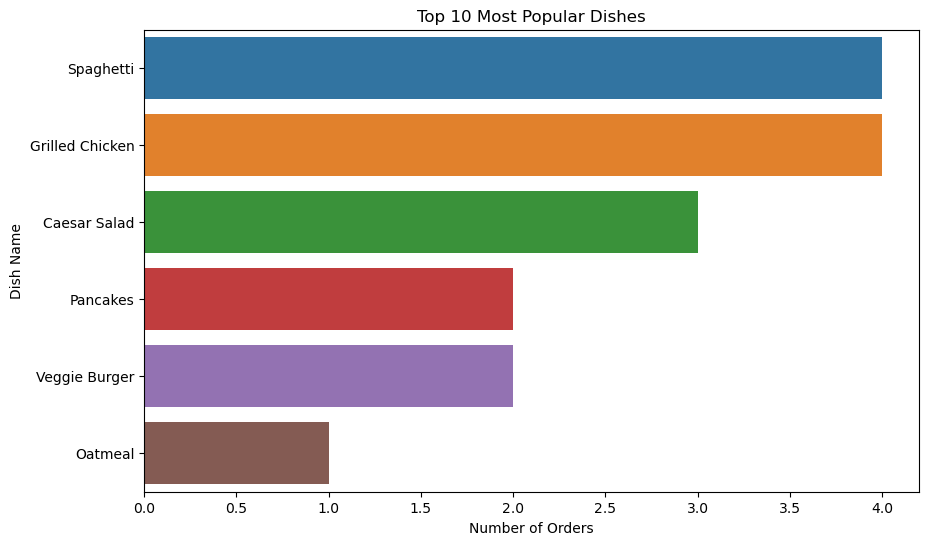

In [96]:
import matplotlib.pyplot as plt
import seaborn as sns

# Bar chart for most popular dishes
plt.figure(figsize=(10, 6))
sns.barplot(x=popular_dishes.values, y=popular_dishes.index)
plt.title('Top 10 Most Popular Dishes')
plt.xlabel('Number of Orders')
plt.ylabel('Dish Name')
plt.savefig('Top 10 Most Popular Dishes.png', dpi=300)
plt.show()
plt.close()

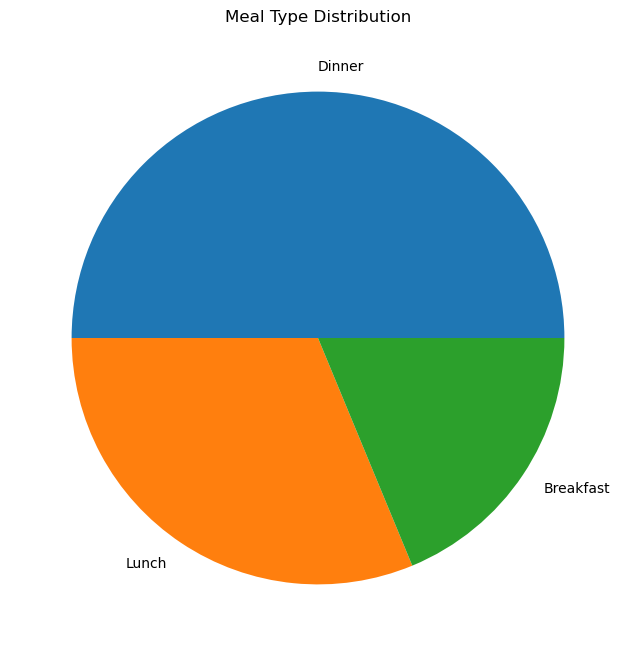

In [97]:
# Pie chart for meal type distribution
plt.figure(figsize=(8, 8))
plt.pie(popular_meal_types, labels=popular_meal_types.index)
plt.title('Meal Type Distribution')
plt.savefig('popular_meal_types.png', dpi=300)
plt.show()
plt.close()

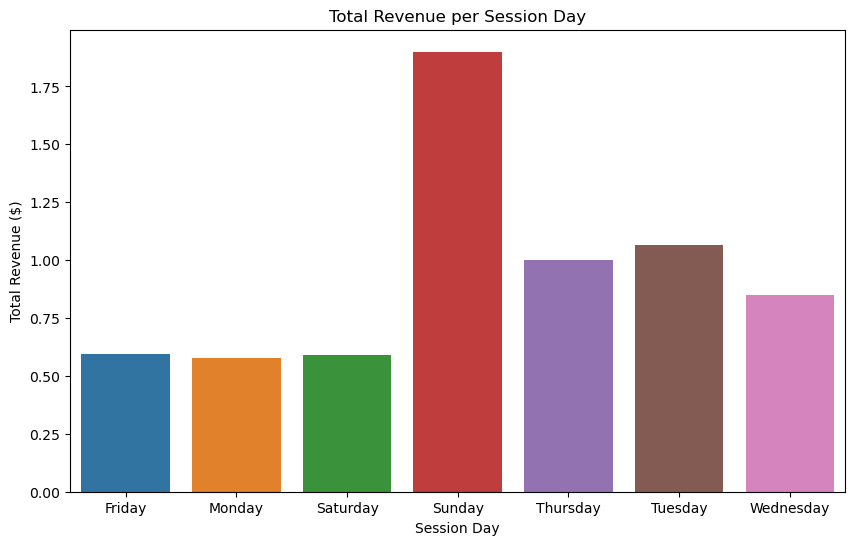

In [98]:

# Bar chart for revenue per session day
plt.figure(figsize=(10, 6))
sns.barplot(x='Session Day', y='Revenue per Session', data=revenue_per_day )
plt.title('Total Revenue per Session Day')
plt.xlabel('Session Day')
plt.ylabel('Total Revenue ($)')
plt.savefig('Total Revenue per Session Day.png', dpi=300)
plt.show()
plt.close()


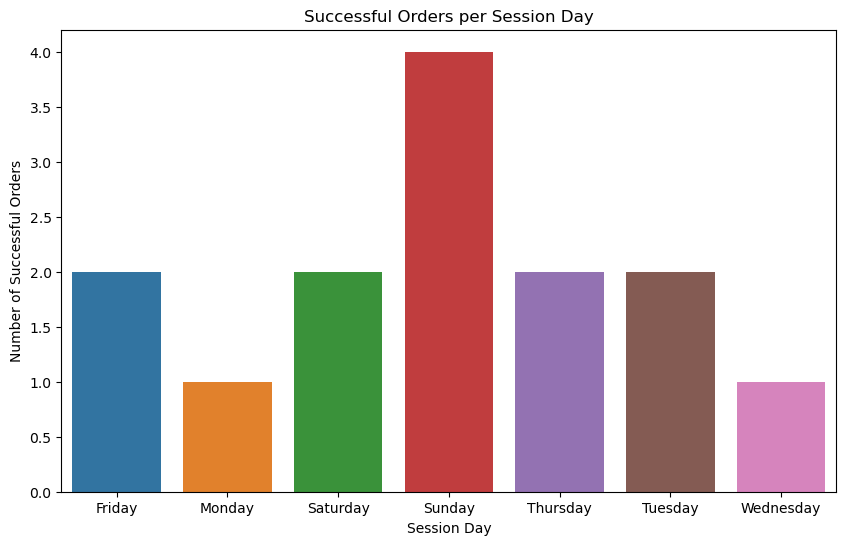

In [99]:
# Bar chart for successful orders per session day
plt.figure(figsize=(10, 6))
sns.barplot(x='Session Day', y='Order Success', data=success_per_day)
plt.title('Successful Orders per Session Day')
plt.xlabel('Session Day')
plt.ylabel('Number of Successful Orders')
plt.savefig('Successful Orders per Session Day.png', dpi=300)
plt.show()
plt.close()

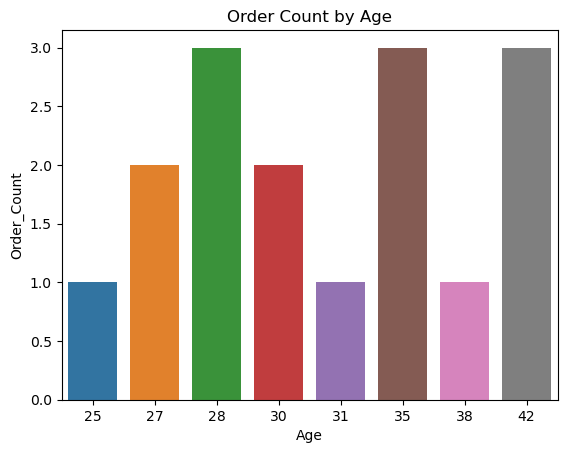

In [100]:
#Bar chart for Order Count by Age
sns.barplot(x='Age', y='Order_Count', data=demographic_analysis)
plt.title('Order Count by Age')
plt.savefig('Order Count by Age.png', dpi=300)
plt.show()
plt.close()


In [90]:
output_path = r"C:\Users\bhanu\Downloads\cleaned_data.csv"
cleaned_data.to_csv(output_path, index=False)
output_path

'C:\\Users\\bhanu\\Downloads\\cleaned_data.csv'